In [128]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pyfas as fa

## Real Data

In [129]:
pd.options.display.max_columns = 25

In [130]:
names = ['../../data/Volve production data_daily.xlsx']#, '../data/Volve production data_monthly.xlsx']

### Dailly data

In [131]:
df = pd.read_excel(names[0])

In [132]:
int_cols = df.select_dtypes(include=['int64']).columns
float_cols = df.select_dtypes(include=['float64']).columns
obj_cols = df.select_dtypes(include=['object']).columns

not_float_cols = df.select_dtypes(include=['datetime64[ns]', 'object', 'int64']).columns

In [133]:
units1 = dict(zip(df[float_cols].columns, ['hrs', 'psi', 'C', 'psi', 'psi', '%', 'psi', 'C', 'psi', 'Sm3', 'Sm3', 'Sm3', 'Sm3']))

In [134]:
df1 = df.drop(columns=['WELL_BORE_CODE', 'NPD_WELL_BORE_NAME', 'NPD_FIELD_CODE', 'NPD_FIELD_NAME', 'NPD_FACILITY_CODE', 'NPD_FACILITY_NAME', 'AVG_CHOKE_UOM'])

In [135]:
producers = {5351: '15/9-F-14', 5599: '15/9-F-12', 7078: '15/9-F-11', 7289: '15/9-F-15 D', 7405: '15/9-F-1 C', 5769: '15/9-F-5', 5693: '15/9-F-4'}
well_nums = [7405, 7078, 5599, 5351, 7289] # df1['Wellbore name'].unique()
wells = dict(zip(well_nums, np.repeat(None, len(well_nums))))

In [136]:
def plot_well(well_num):
    wells[well_num] = df1[df1['NPD_WELL_BORE_CODE'] == well_num]
    wells[well_num] = wells[well_num].drop(columns=['NPD_WELL_BORE_CODE', 'FLOW_KIND', 'WELL_TYPE'])
#     if well_num == 7405:
#         wells[well_num] = wells[well_num].drop(columns=['AVG_ANNULUS_PRESS'])
#     if well_num != 5769 and well_num != 5693:
#         wells[well_num] = wells[well_num].drop(columns=['BORE_WI_VOL'])
    
    plt.figure(figsize=(18, 50))

    for i, col in enumerate(wells[well_num].columns[1:]):
        plt.subplot(len(wells[well_num].columns), 1, i+1)
        plt.plot(wells[well_num].DATEPRD, wells[well_num][col])
        plt.title(f'{col}, {producers[well_num]}')
        plt.ylabel(units1[col])
        plt.grid(True)

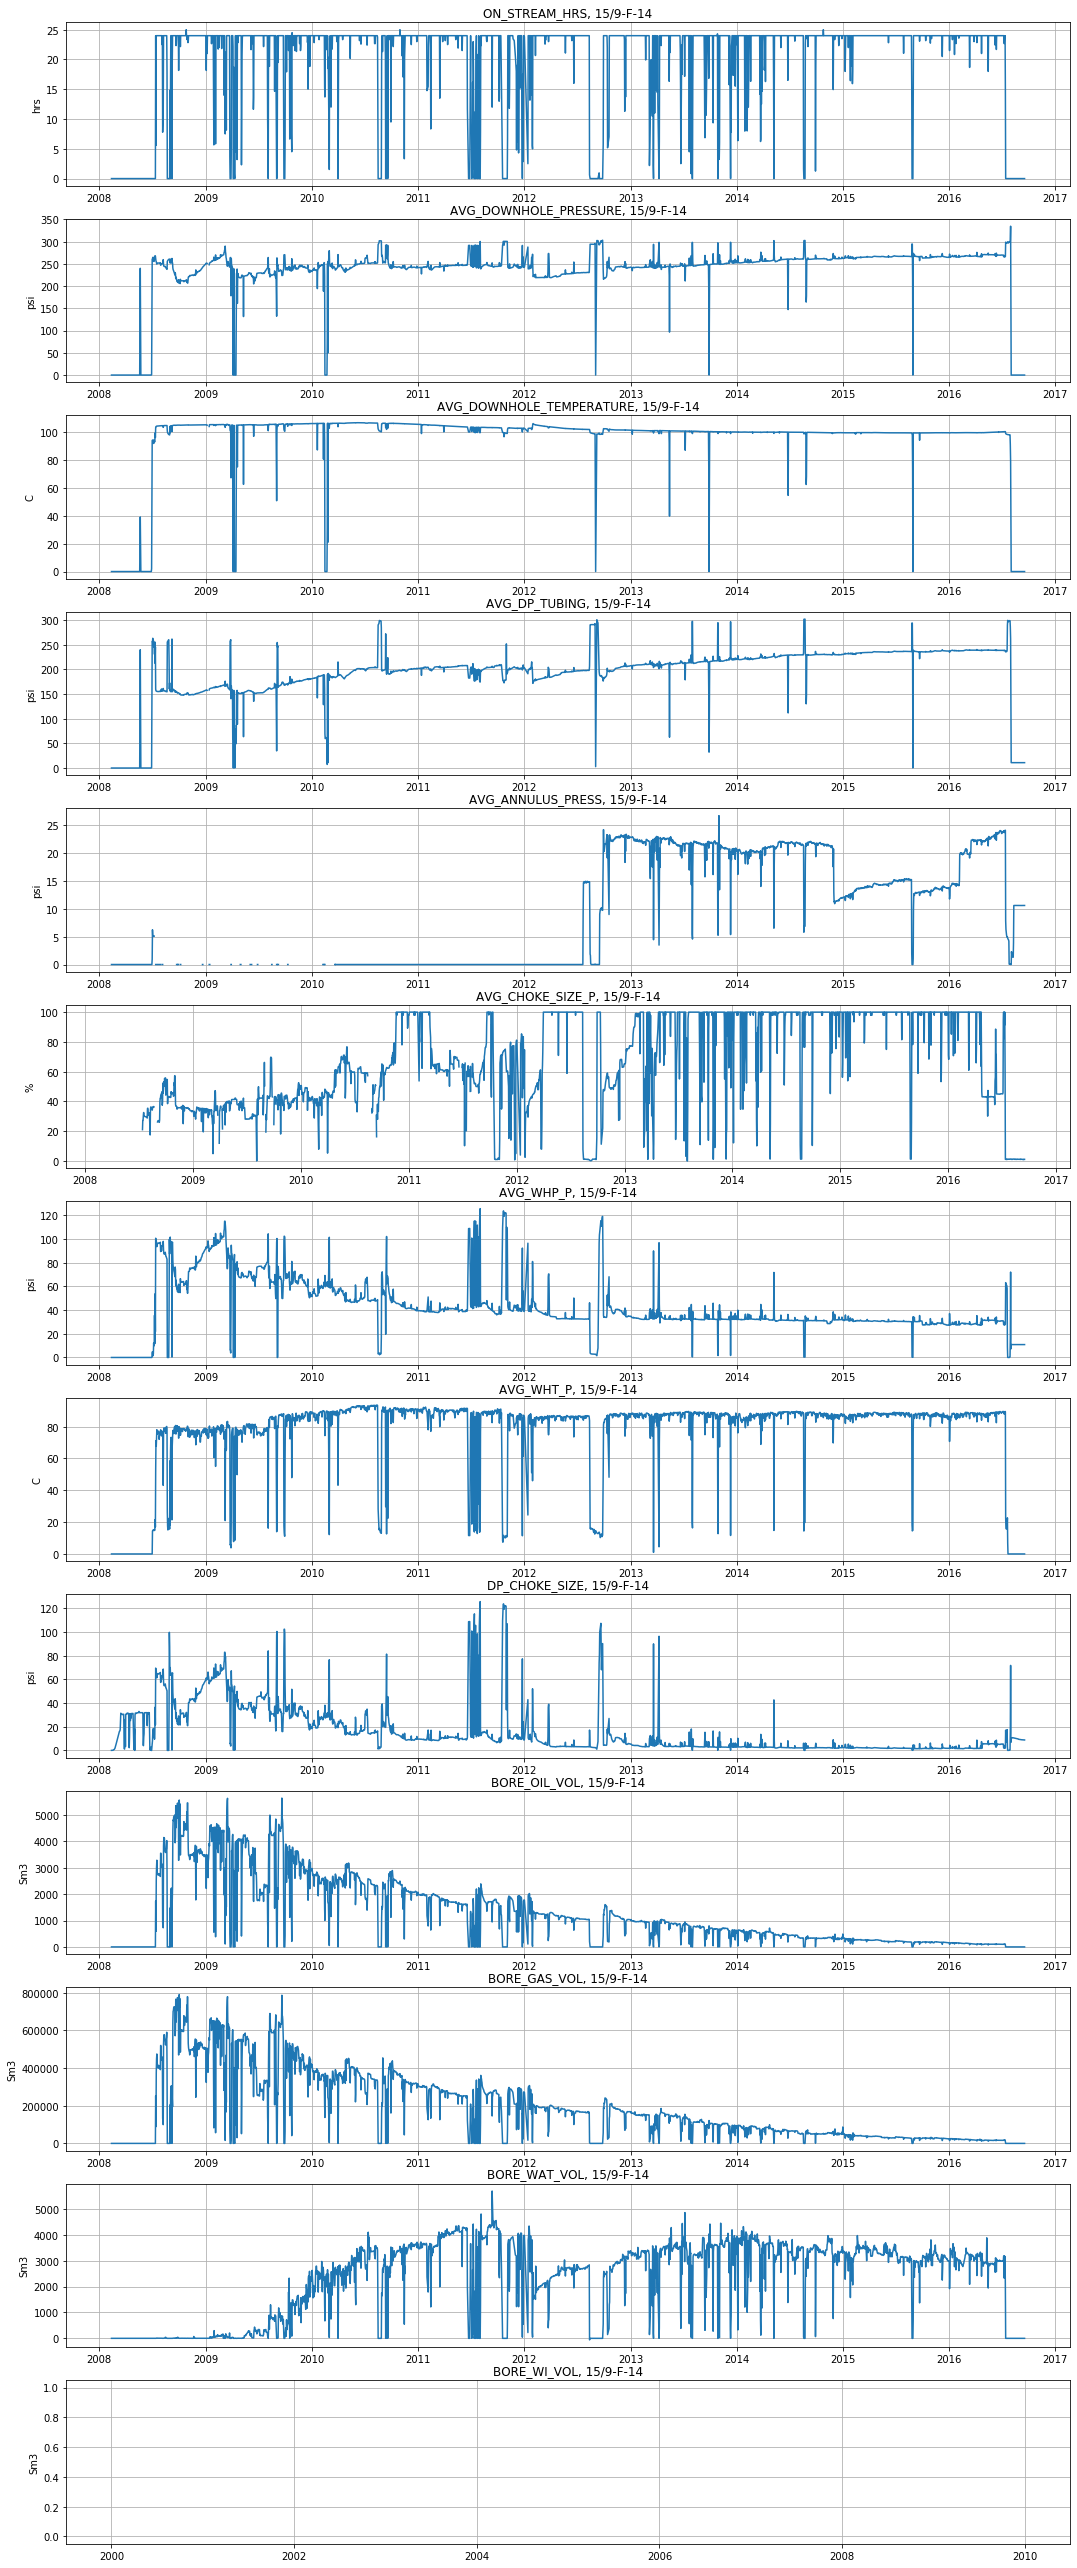

In [120]:
plot_well(5351)

In [121]:
wells[5351].AVG_CHOKE_SIZE_P is not None

True

In [122]:
wells[5351].AVG_CHOKE_SIZE_P.isna().sum()
wells[5351] = wells[5351][wells[5351].AVG_CHOKE_SIZE_P.notna()] # drop nan chokes
wells[5351].AVG_CHOKE_SIZE_P.isna().sum()

0

In [124]:
filt_df = wells[5351].drop(columns=['DATEPRD'])

In [125]:
filt_df = wells[5351].drop(columns=['DATEPRD'])
low = .20
high = .80
quant_df = filt_df.quantile([low, high])
tmp = filt_df.apply(lambda x: x[(x>quant_df.loc[low,x.name]) & 
                                    (x < quant_df.loc[high,x.name])], axis=0)
wells[5351] = tmp

In [126]:
wells[5351]

,ON_STREAM_HRS,AVG_DOWNHOLE_PRESSURE,AVG_DOWNHOLE_TEMPERATURE,AVG_DP_TUBING,AVG_ANNULUS_PRESS,AVG_CHOKE_SIZE_P,AVG_WHP_P,AVG_WHT_P,DP_CHOKE_SIZE,BORE_OIL_VOL,BORE_GAS_VOL,BORE_WAT_VOL,BORE_WI_VOL
5014,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21.26599,NaN,NaN,NaN,NaN
5102,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.77805,NaN,NaN,NaN,NaN
5118,NaN,260.866875,103.292880,NaN,NaN,NaN,NaN,NaN,NaN,1735.26,252235.23,NaN,NaN
5119,NaN,256.248230,104.017718,NaN,NaN,NaN,NaN,NaN,NaN,592.36,88949.00,NaN,NaN
5120,NaN,254.982785,103.967009,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8018,NaN,NaN,NaN,NaN,10.58266,NaN,NaN,NaN,8.89437,NaN,NaN,NaN,NaN
8019,NaN,NaN,NaN,NaN,10.58311,NaN,NaN,NaN,8.88767,NaN,NaN,NaN,NaN
8020,NaN,NaN,NaN,NaN,10.58207,NaN,NaN,NaN,8.85606,NaN,NaN,NaN,NaN
8021,NaN,NaN,NaN,NaN,10.58325,NaN,NaN,NaN,8.83878,NaN,NaN,NaN,NaN


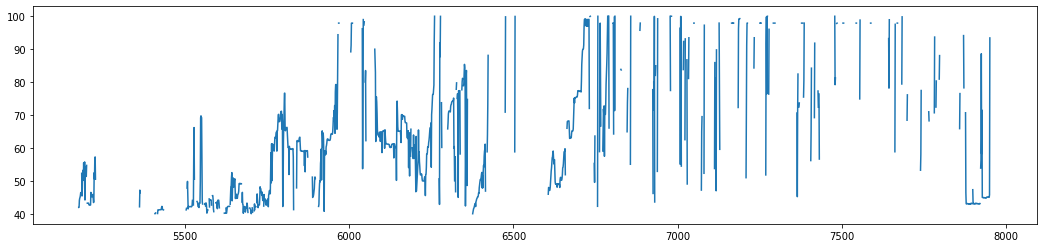

In [127]:
plt.figure(figsize=(18, 4))
plt.plot(wells[5351].AVG_CHOKE_SIZE_P)

In [106]:
wells[5351] = wells[5351].fillna(0)
wells[5351][wells[5351] < 0] = 0

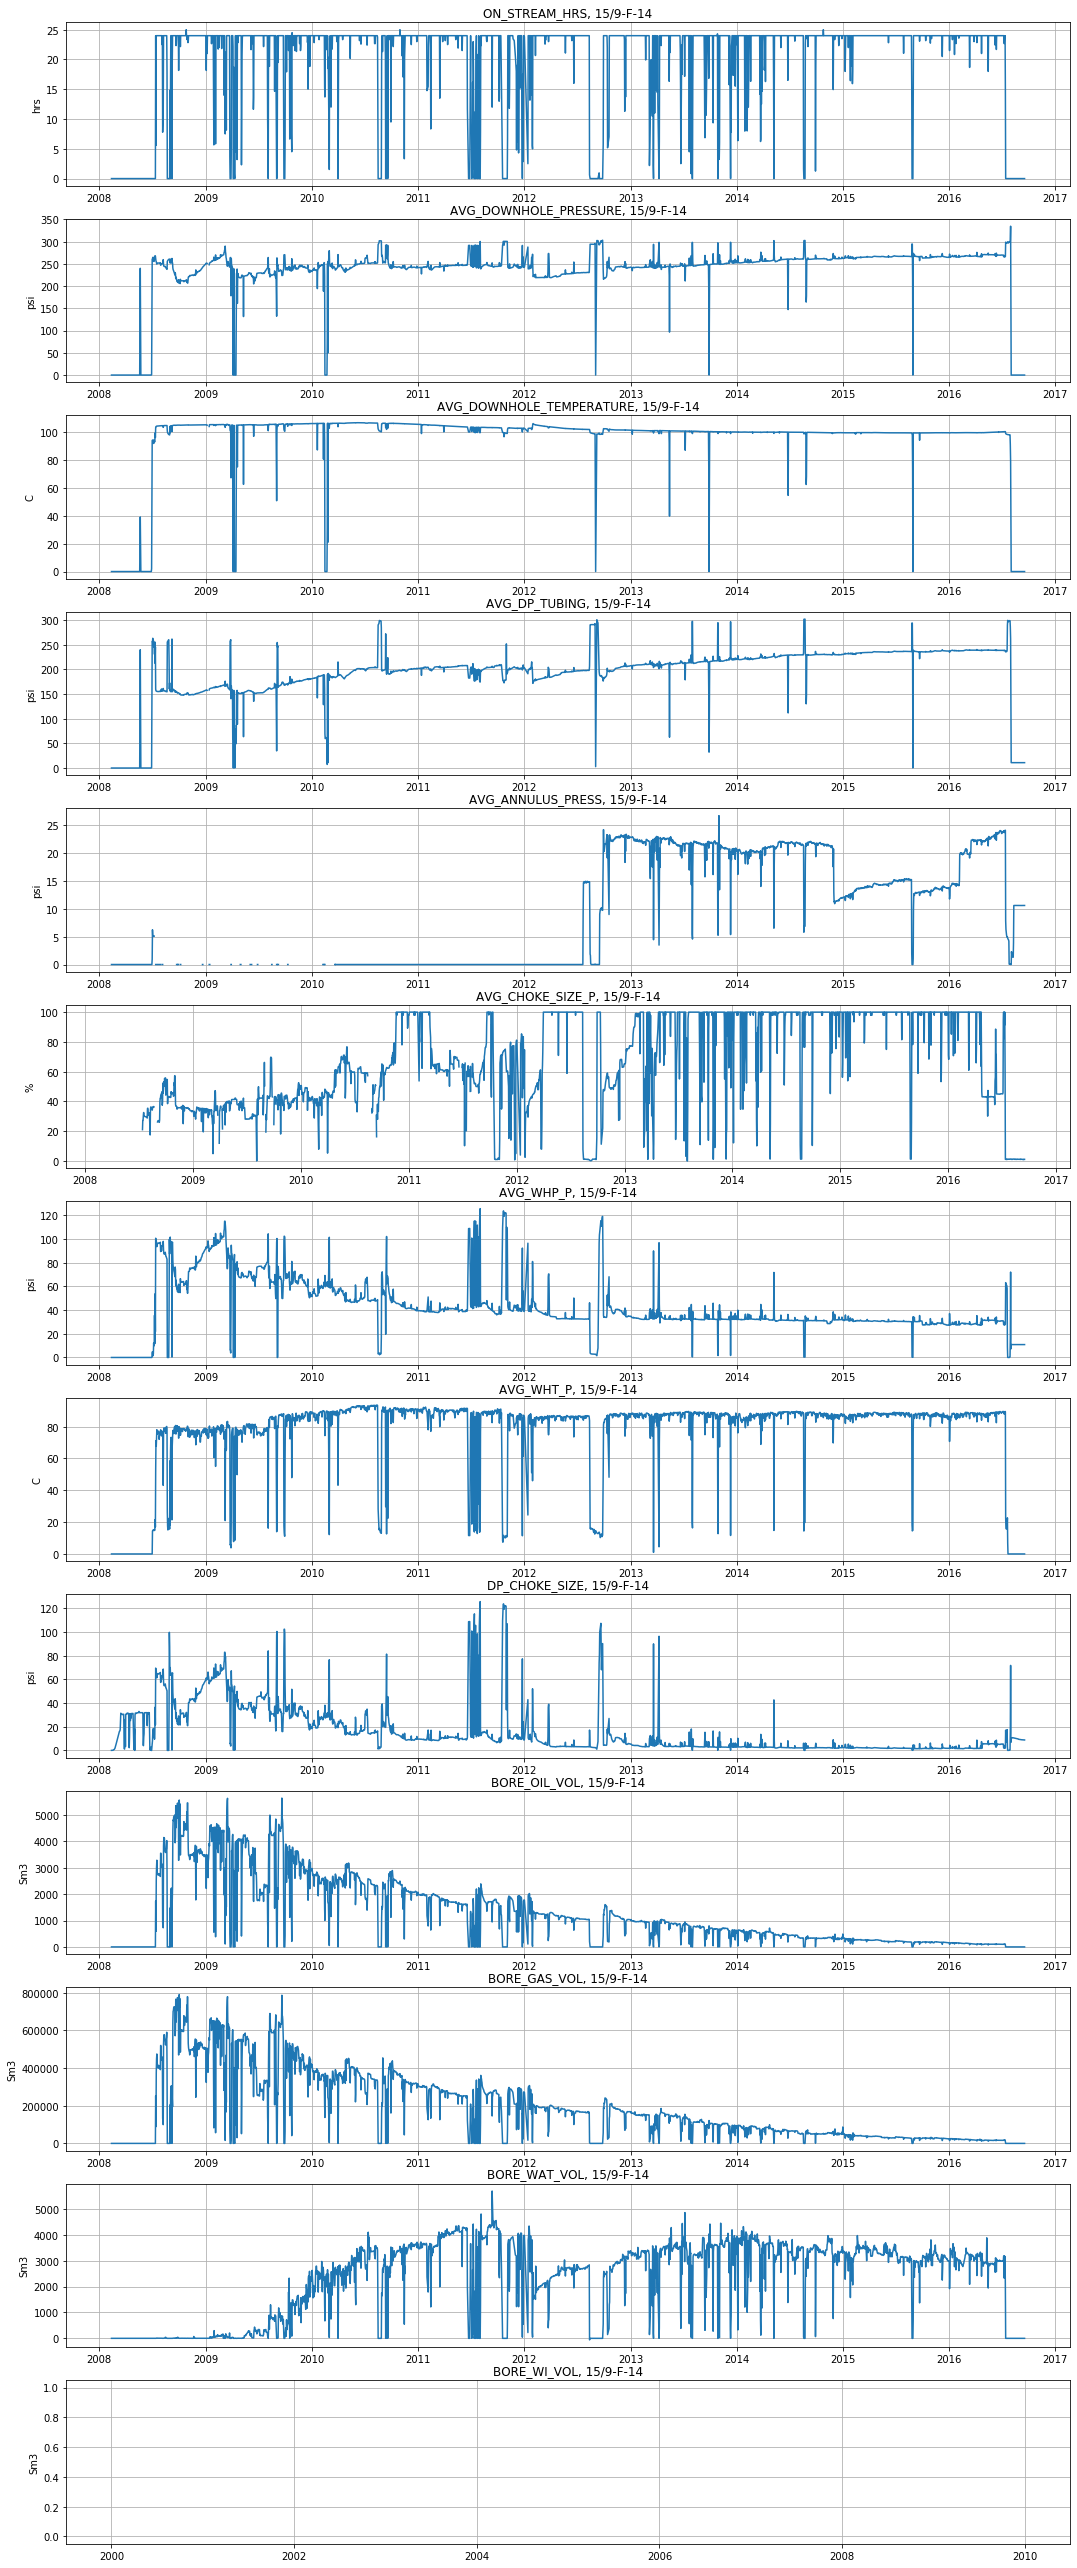

In [108]:
plot_well(5351)

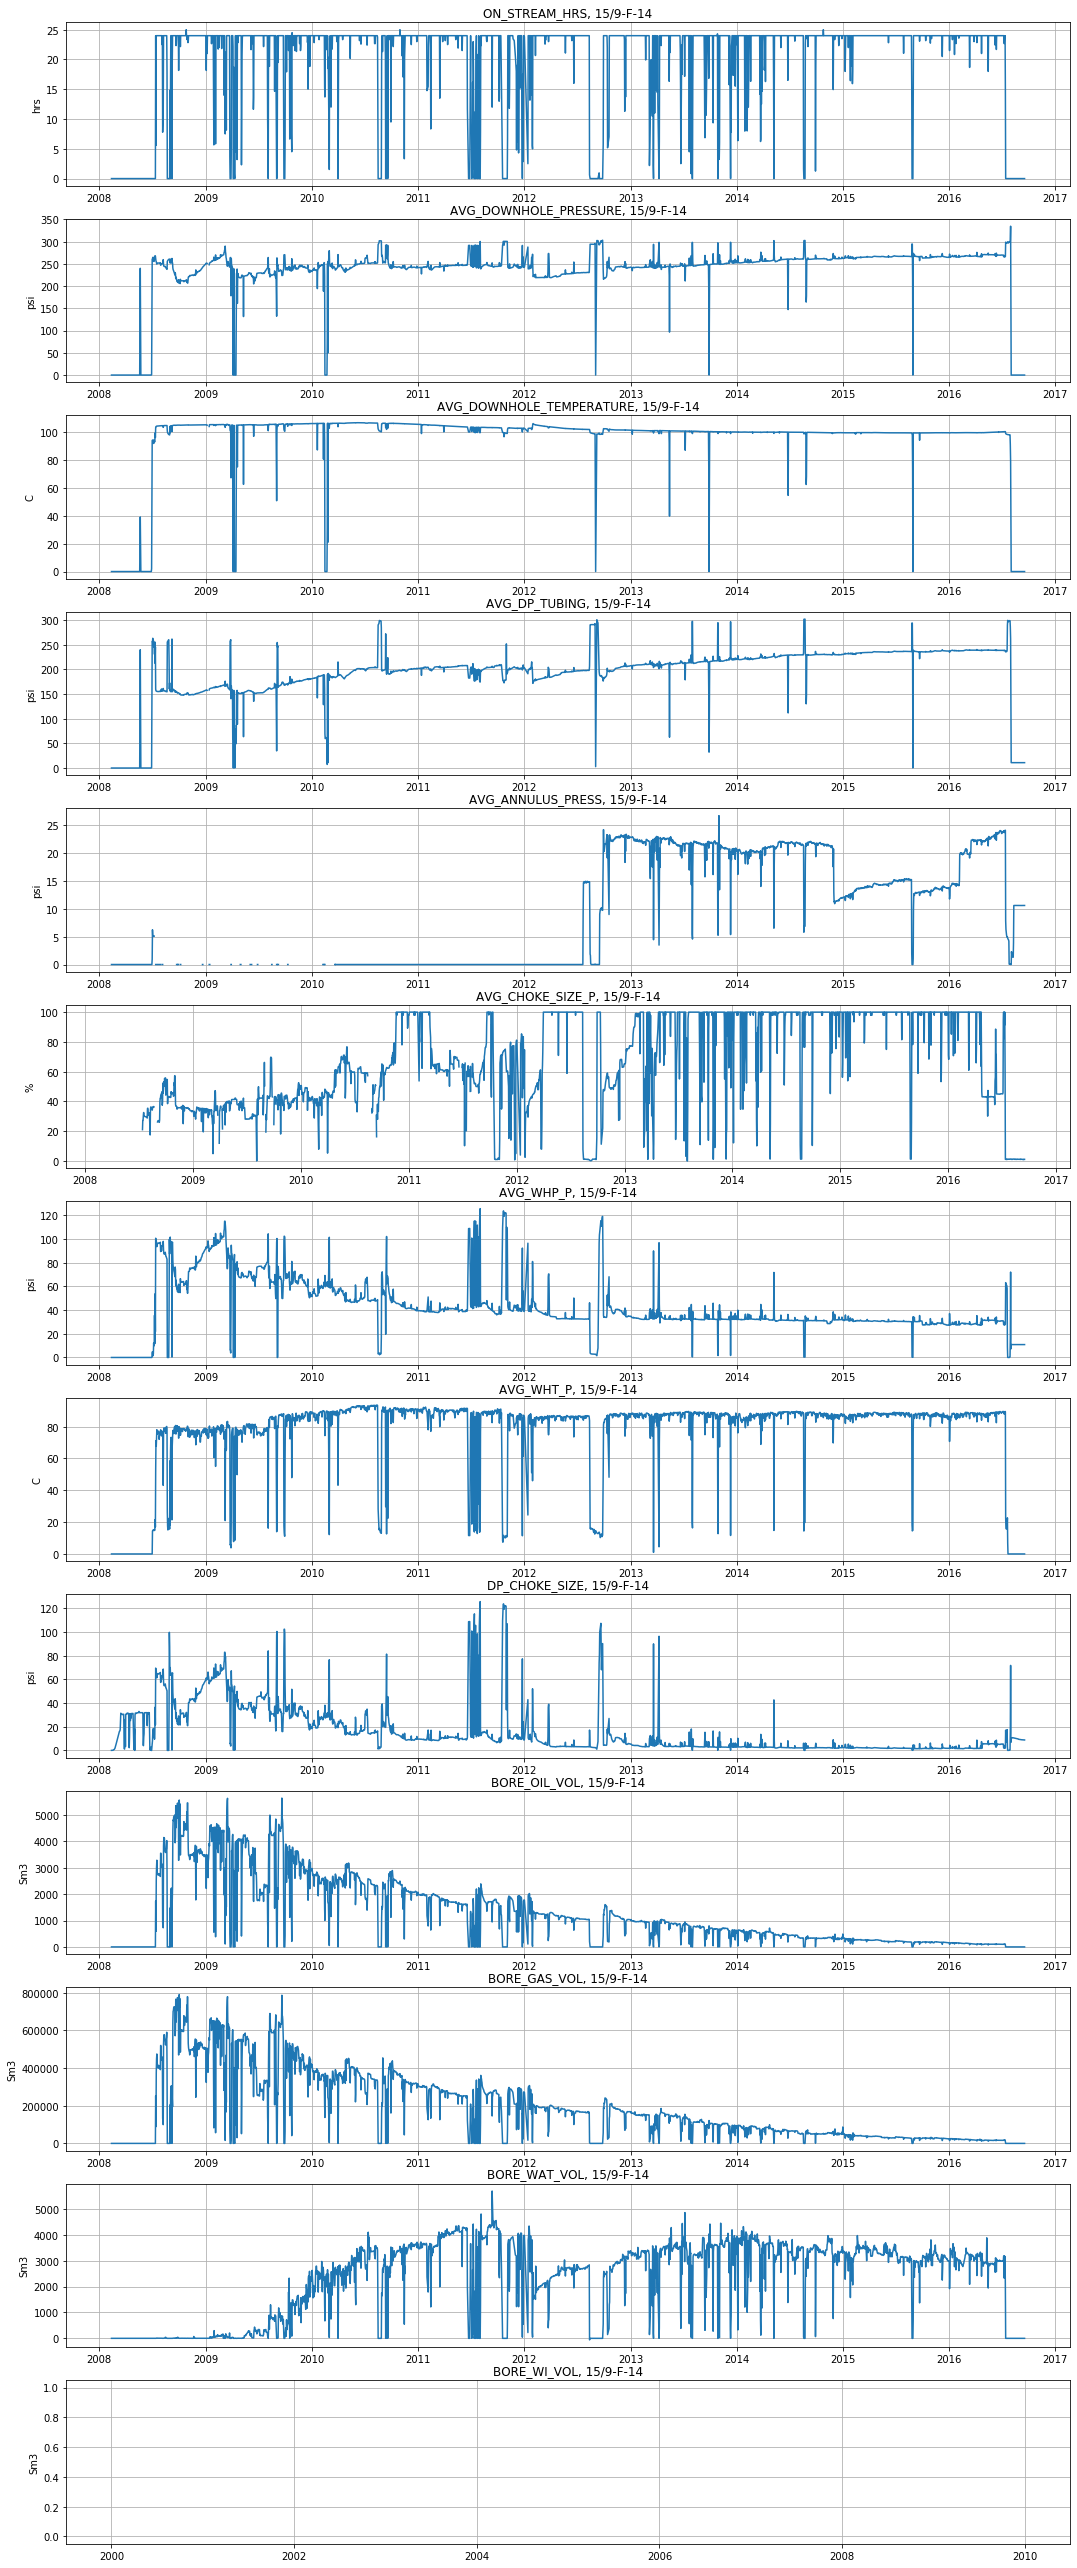

In [59]:
plot_well(5351)

## OTHER

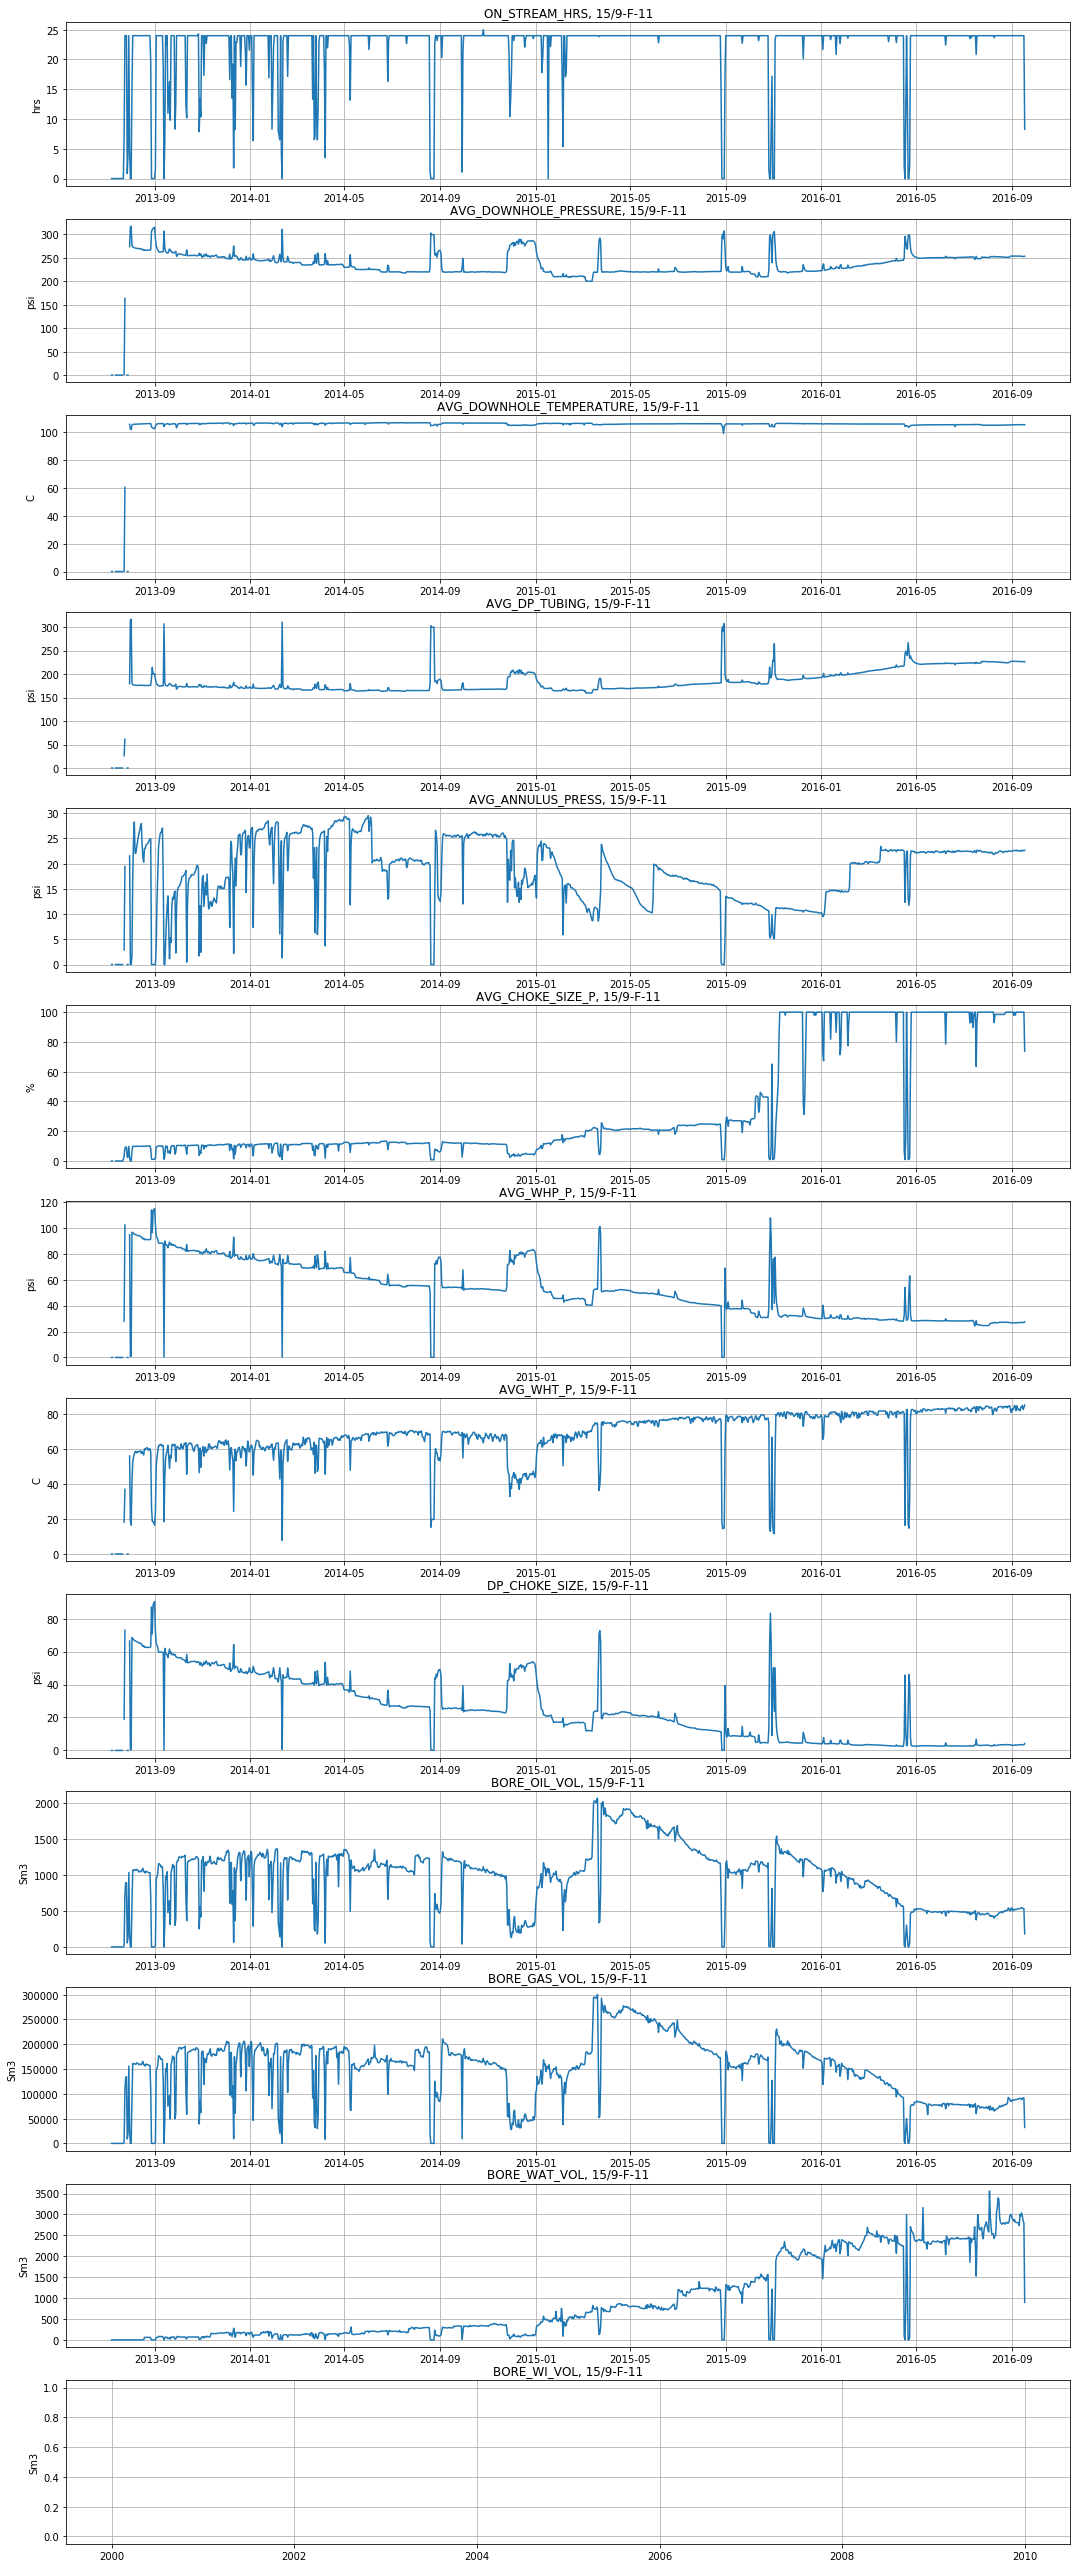

In [33]:
plot_well(7078)

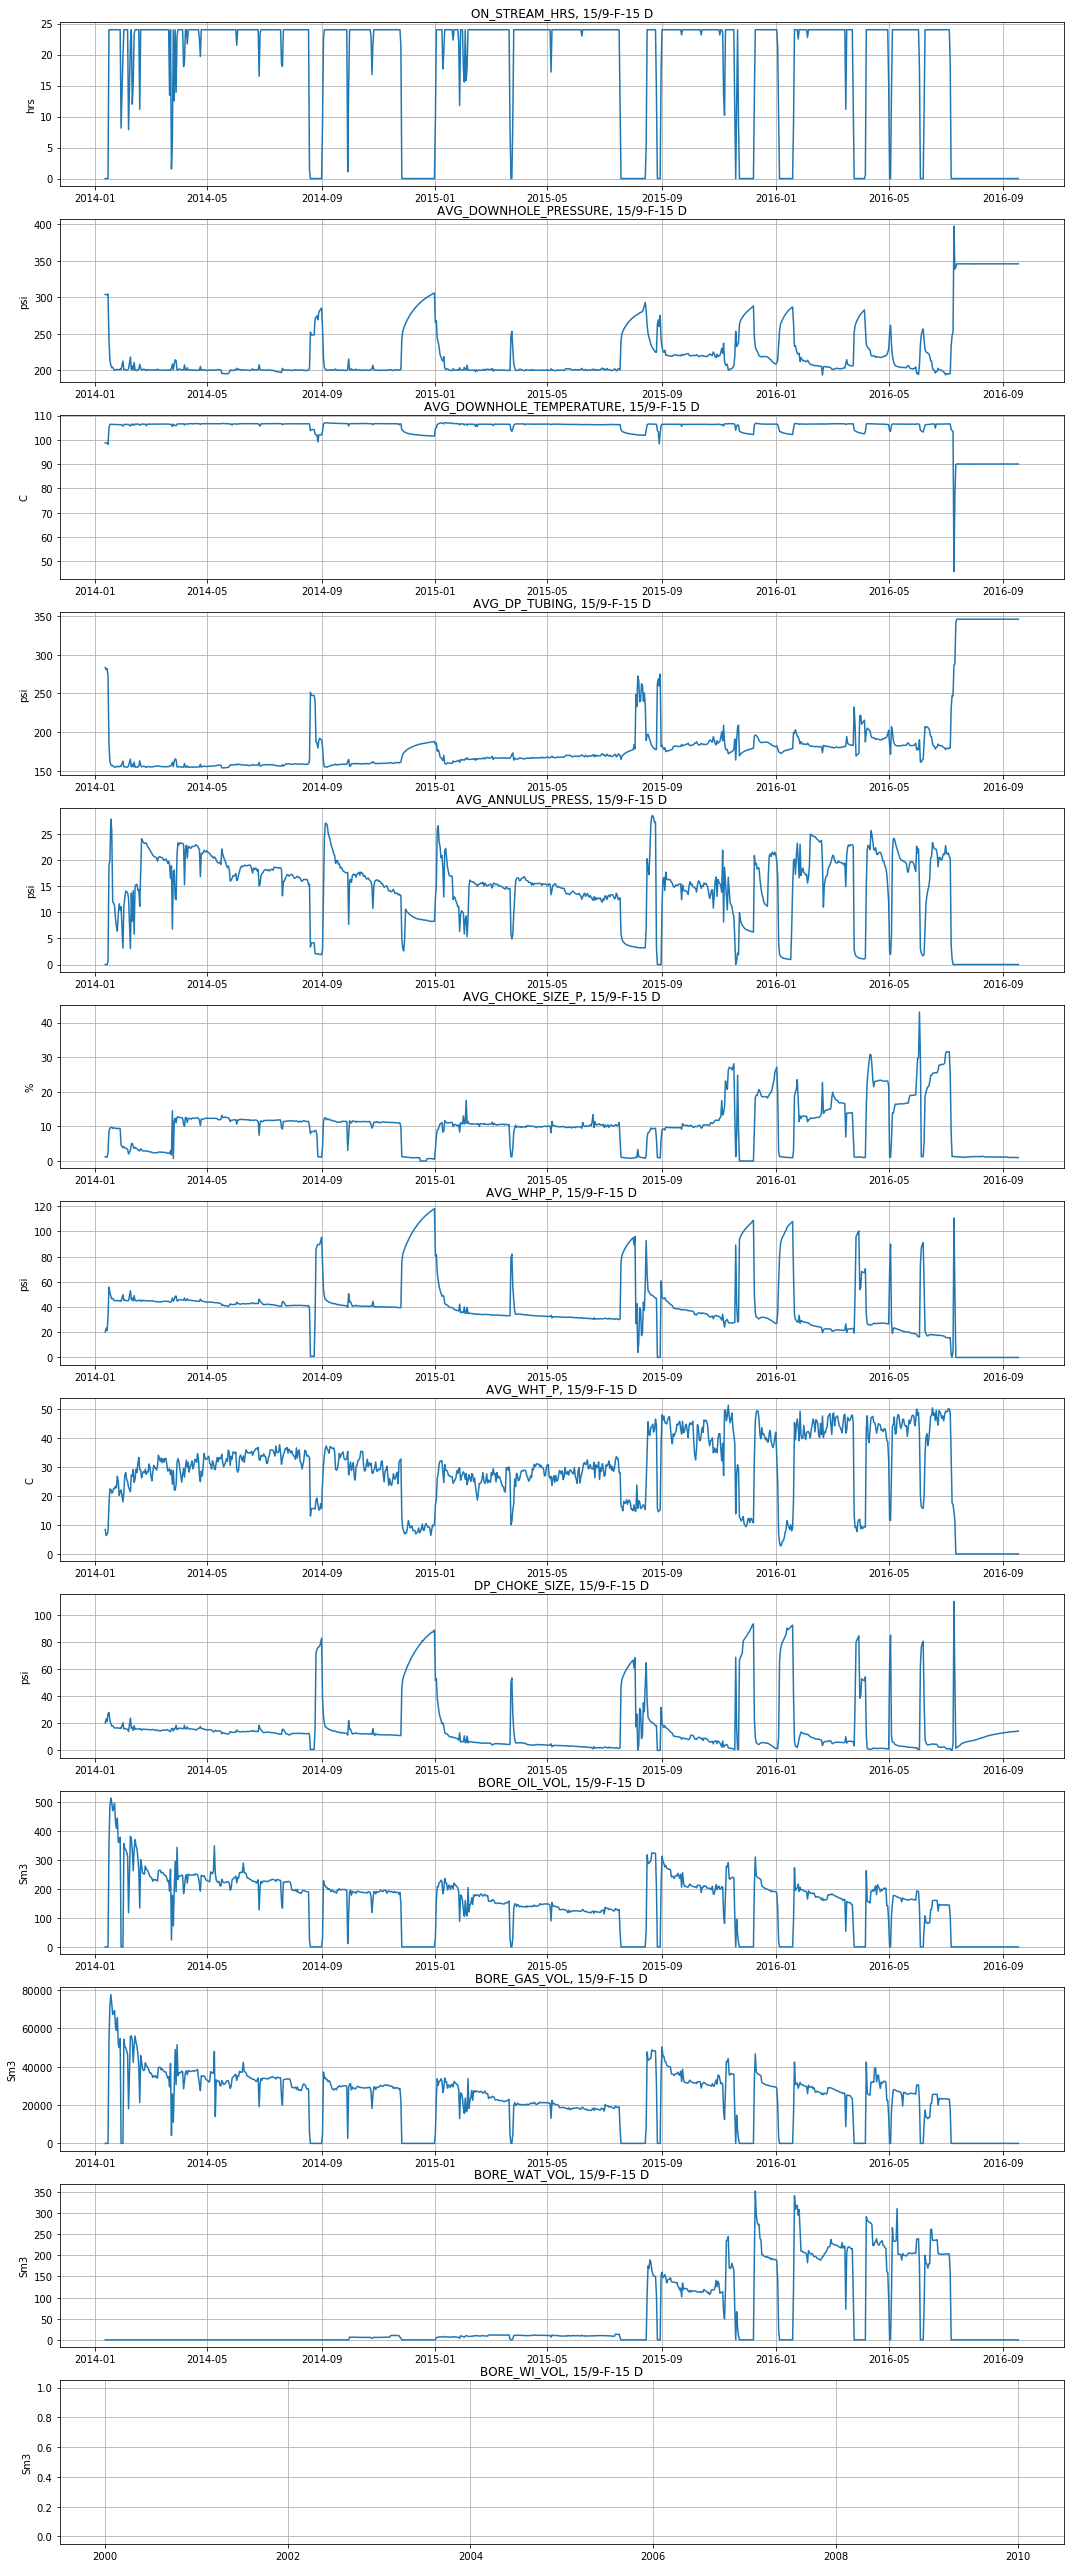

In [34]:
plot_well(7289)

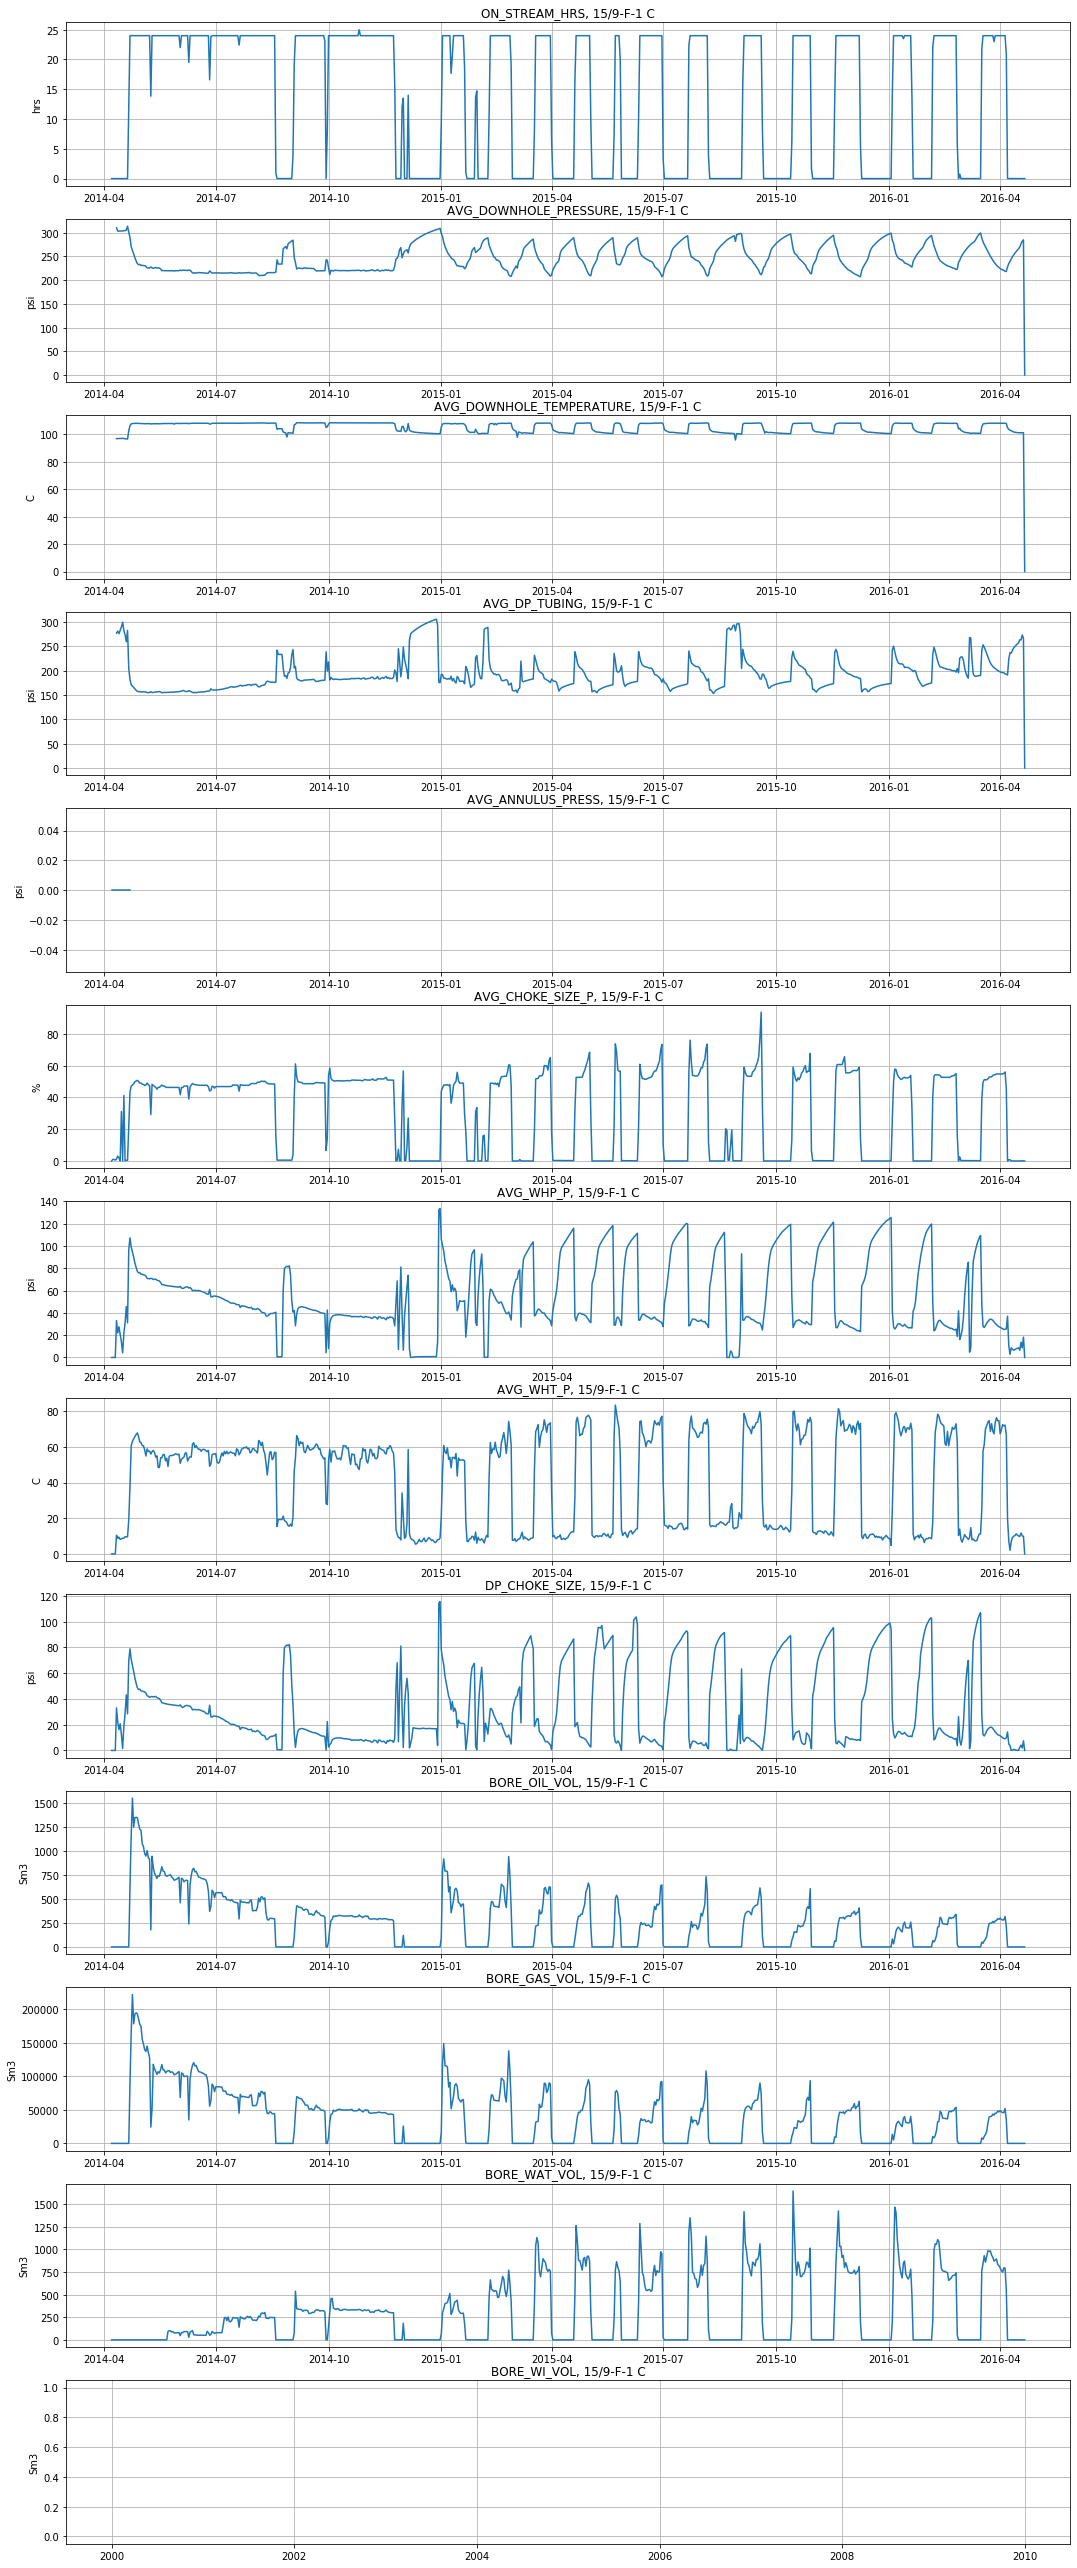

In [138]:
plot_well(7405)

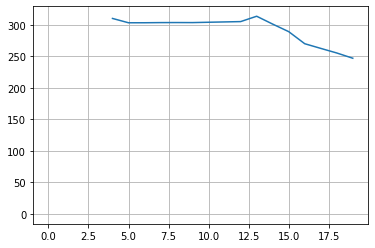

In [144]:
plt.plot(wells[7405].AVG_DOWNHOLE_PRESSURE[:20])
plt.grid(True)